In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
import datetime as dt
import seaborn as sns
sns.set(style="ticks")
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
customers = pd.read_csv('CUSTOMERS.csv')
sellers = pd.read_csv('SELLERS.csv')
products = pd.read_csv('PRODUCTS.csv')
orders = pd.read_csv('ORDERS.csv')
order_items = pd.read_csv('ORDER_ITEMS.csv')
order_payment = pd.read_csv('ORDER_PAYMENTS.csv')
order_review = pd.read_csv('ORDER_REVIEW_RATINGS.csv')
geo_location = pd.read_csv('GEO_LOCATION.csv')

#  1. Exploratory Data Analysis (EDA)       

# a. Total Revenue, Quantity, Products, Categories, Sellers, Locations and Payment methods

In [3]:
total_revenue = order_payment['payment_value'].sum()
print('Total Revenue:',total_revenue)

Total Revenue: 16008872.12


In [4]:
total_quantity = order_items['order_item_id'].count()
print('Total Quantity:',total_quantity)

Total Quantity: 112650


In [5]:
total_products = products['product_id'].nunique()
print('Total Products:',total_products)

Total Products: 32951


In [6]:
total_category = products['product_category_name'].nunique()
print('Total Categories:',total_category)

Total Categories: 71


In [7]:
total_sellers = sellers['seller_id'].nunique()
print('Total Sellers:',total_sellers)

Total Sellers: 3095


In [8]:
total_locations = geo_location['geolocation_zip_code_prefix'].nunique()
print('Total Locations:',total_locations)

Total Locations: 19015


In [9]:
total_payment_methods = order_payment['payment_type'].nunique()
print('Total Payment Methods:',total_payment_methods)

Total Payment Methods: 5


# b . Monthly New Customer Acquisition

In [10]:
orders.order_purchase_timestamp=pd.to_datetime(orders.order_purchase_timestamp,dayfirst=False)

In [11]:
customer_order = pd.merge(customers,orders,on='customer_id',how='inner')
first_order = customer_order.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()
first_order.columns = ['customer_unique_id','order_date']

first_order['order_month'] = first_order.order_date.dt.to_period('M')
new_customers_per_month = first_order.groupby('order_month')['customer_unique_id'].count().reset_index()
new_customers_per_month.columns = ['Month','new_customers']
new_customers_per_month
                                   

,Month,new_customers
0,2016-09,4
1,2016-10,321
2,2016-12,1
3,2017-01,764
4,2017-02,1752
5,2017-03,2636
6,2017-04,2352
7,2017-05,3596
8,2017-06,3139
9,2017-07,3894


# c. Customer Retension: Month-over-Month Anlysis

In [12]:
customer_order['order_month'] = customer_order.order_purchase_timestamp.dt.to_period('M')

first_order_1= customer_order.groupby('customer_unique_id')['order_purchase_timestamp'].min().dt.to_period('M')
customer_order['first_order_month'] = customer_order['customer_unique_id'].map(first_order_1)

In [13]:
# Convert period to datetime for difference calculation
customer_order['order_month_dt'] = customer_order['order_month'].dt.to_timestamp()
customer_order['first_order_month_dt'] = customer_order['first_order_month'].dt.to_timestamp()

# how many months since first order
customer_order['first_order_index'] = ((customer_order['order_month_dt'].dt.year - customer_order['first_order_month_dt'].dt.year) * 12 + 
                                    (customer_order['order_month_dt'].dt.month - customer_order['first_order_month_dt'].dt.month) + 1)


In [14]:
retention = customer_order.groupby(['first_order_month', 'first_order_index'])['customer_unique_id'].nunique().reset_index()

retention_matrix = retention.pivot(index='first_order_month', columns='first_order_index', values='customer_unique_id')
retention_matrix

first_order_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21
first_order_month,,,,,,,,,,,,,,,,,,,,
2016-09,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,321.00,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,1.00,NaN,1.00,NaN,1.00,NaN,1.00,NaN,1.00,2.00,2.00
2016-12,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,764.00,3.00,2.00,1.00,3.00,1.00,4.00,1.00,1.00,NaN,3.00,1.00,6.00,3.00,1.00,1.00,2.00,3.00,1.00,NaN
2017-02,1752.00,4.00,5.00,2.00,7.00,2.00,4.00,3.00,3.00,4.00,2.00,5.00,3.00,3.00,2.00,1.00,1.00,4.00,NaN,NaN
2017-03,2636.00,13.00,10.00,10.00,9.00,4.00,4.00,8.00,9.00,2.00,10.00,4.00,6.00,3.00,4.00,6.00,2.00,4.00,NaN,NaN
2017-04,2352.00,14.00,5.00,4.00,8.00,6.00,8.00,7.00,7.00,4.00,6.00,2.00,2.00,1.00,2.00,2.00,5.00,NaN,NaN,NaN
2017-05,3596.00,18.00,18.00,14.00,11.00,12.00,15.00,6.00,9.00,11.00,9.00,12.00,9.00,1.00,7.00,9.00,NaN,NaN,NaN,NaN
2017-06,3139.00,15.00,11.00,13.00,8.00,12.00,12.00,7.00,4.00,7.00,10.00,11.00,5.00,4.00,6.00,NaN,NaN,NaN,NaN,NaN


# d. Revenue Contribution: New vs Existing Customers (Monthly Trend)

In [15]:
customer_order_payment = pd.merge(customer_order, order_payment, on='order_id', how='inner')
customer_order_payment['customer_type'] = customer_order_payment.apply(
    lambda x: 'New' if x['order_month'] == x['first_order_month'] else 'Existing',
    axis=1)

In [16]:
revenue_by_type = customer_order_payment.groupby(['order_month', 'customer_type'])['payment_value'].sum().reset_index()

revenue_split = revenue_by_type.pivot(index='order_month', columns='customer_type', values='payment_value').fillna(0)
revenue_split['Total_revenue']= revenue_split.sum(axis=1)
revenue_split.reset_index(inplace=True)
revenue_split

customer_type,order_month,Existing,New,Total_revenue
0,2016-09,0.00,252.24,252.24
1,2016-10,0.00,59090.48,59090.48
2,2016-12,0.00,19.62,19.62
3,2017-01,19.62,138468.42,138488.04
4,2017-02,170.83,291737.18,291908.01
5,2017-03,650.82,449212.78,449863.60
6,2017-04,2566.60,415221.43,417788.03
7,2017-05,5324.21,587594.61,592918.82
8,2017-06,6031.20,505245.18,511276.38
9,2017-07,10194.69,582188.23,592382.92


# e. Sales and Quantity Trends by Category, Location, Month, Week, Day and Payment Method

In [23]:
df = pd.merge(customer_order_payment, order_items, on='order_id', how='inner')

In [25]:
df = pd.merge(df, products, on='product_id', how='inner')

In [100]:
print(*df.columns,sep=', ')

customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, order_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, order_month, first_order_month, order_month_dt, first_order_month_dt, first_order_index, payment_sequential, payment_type, payment_installments, payment_value, customer_type, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, order_week, order_day


* Sales and Qty by Category

In [54]:
category_summary = df.groupby('product_category_name').agg({
    'payment_value':'sum','order_item_id':'count'}).reset_index().rename(columns={
    'order_item_id': 'total_quantity','payment_value': 'total_revenue'}).sort_values(by='total_revenue', ascending=False).reset_index(drop=True)
category_summary

,product_category_name,total_revenue,total_quantity
0,Bed_Bath_Table,1712553.67,11823
1,Health_Beauty,1657373.12,9972
2,Computers_Accessories,1585330.45,8082
3,Furniture_Decor,1430176.39,8744
4,Watches_Gifts,1429216.68,6201
...,...,...,...
66,Flowers,2213.01,33
67,Home_Comfort_2,1710.54,31
68,Cds_Dvds_Musicals,1199.43,14
69,Fashion_Childrens_Clothes,785.67,8


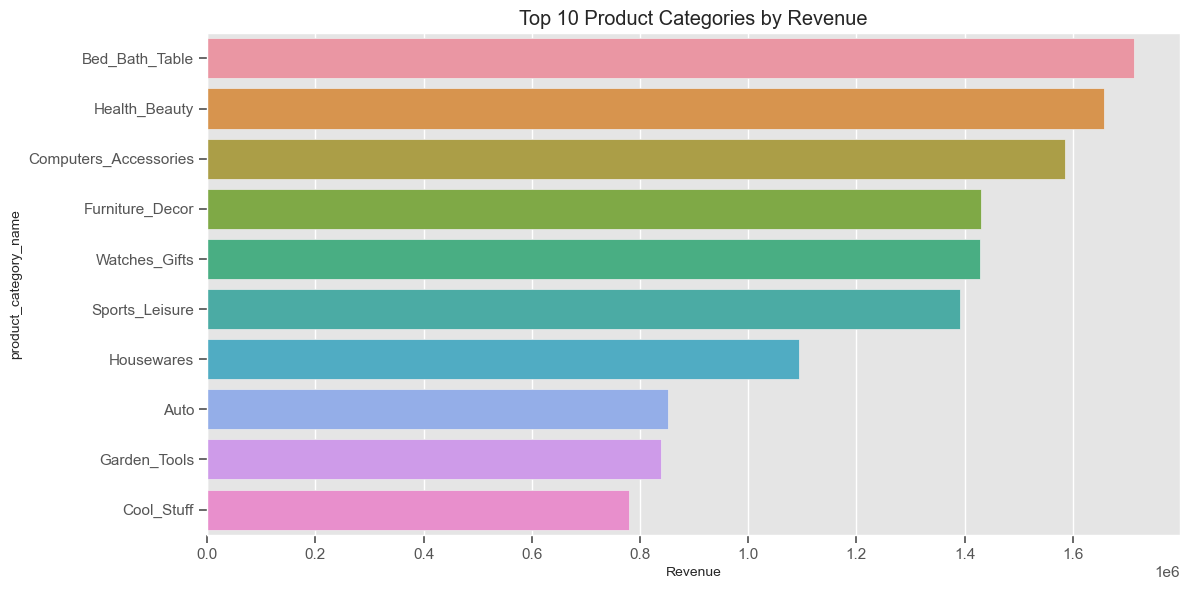

In [50]:
top10_cat = category_summary.head(10)

plt.figure(figsize=(12,6))
sns.barplot(y=top10_cat['product_category_name'],x= top10_cat['total_revenue'])
plt.xlabel("Revenue")
plt.title("Top 10 Product Categories by Revenue")
plt.tight_layout()
plt.show()

* Sales and Qty by States

In [53]:
state_summary = df.groupby('customer_state').agg({
    'payment_value':'sum','order_item_id':'count'}).reset_index().rename(columns={
    'order_item_id': 'total_quantity','payment_value': 'total_revenue'}).sort_values(by='total_revenue', ascending=False).reset_index(drop=True)
state_summary

,customer_state,total_revenue,total_quantity
0,Andhra Pradesh,12105033.80,72332
1,Gujarat,1607461.11,8840
2,Chhattisgarh,1307870.49,7383
3,Karnataka,795840.81,4527
4,Delhi,731575.44,3915
5,Madhya Pradesh,600853.55,3358
6,Tamil Nadu,469682.30,2451
7,Haryana,456062.24,2618
8,Maharashtra,425633.33,2316
9,Jammu & Kashmir,334496.74,1818


* Sales and Qty by Month

In [55]:
monthly_summary = df.groupby('order_month').agg({
    'order_item_id': 'count',
    'payment_value': 'sum'
}).reset_index().rename(columns={
    'order_item_id': 'total_quantity',
    'payment_value': 'total_revenue'
}).reset_index(drop=True)
monthly_summary

,order_month,total_quantity,total_revenue
0,2016-09,3,347.52
1,2016-10,381,73914.58
2,2016-12,1,19.62
3,2017-01,1005,187779.41
4,2017-02,2062,344134.79
5,2017-03,3181,526961.66
6,2017-04,2855,505665.53
7,2017-05,4396,724504.55
8,2017-06,3781,600753.27
9,2017-07,4840,737293.08


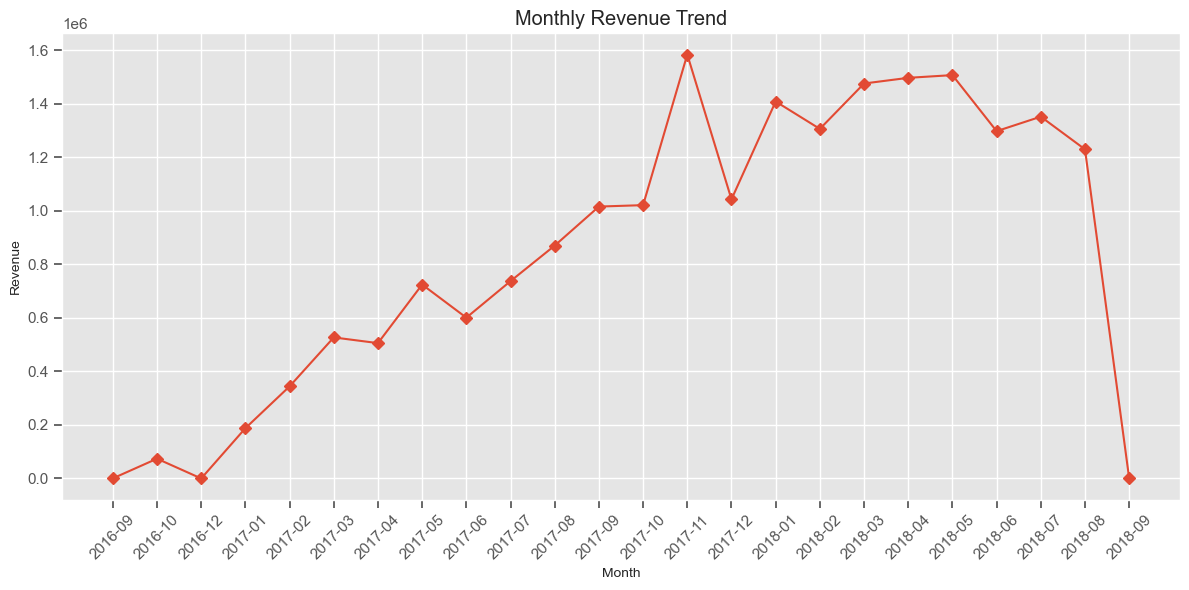

In [96]:
plt.figure(figsize=(12,6))
plt.plot(monthly_summary['order_month'].astype(str), monthly_summary['total_revenue'], marker='D')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


* Sales and Qty by Week

In [98]:
df['order_week'] = df.order_purchase_timestamp.dt.isocalendar().week
df['order_day'] = df.order_purchase_timestamp.dt.day_name()

In [108]:
weekly_summary = df.groupby('order_week').agg({'order_item_id':'count',
                                              'payment_value':'sum'}).reset_index().rename(columns={
    'order_item_id': 'total_quantity',
    'payment_value': 'total_revenue'}).sort_values('total_revenue',ascending=False).reset_index(drop=True)
weekly_summary.head(10)

,order_week,total_quantity,total_revenue
0,47,3637,658518.60
1,32,3499,628741.90
2,19,3329,623626.86
3,31,3516,570970.96
4,20,3332,569137.89
5,30,3100,534428.61
6,29,3100,517292.10
7,33,3331,514368.41
8,16,2738,495445.22
9,18,3027,492082.69


* Sales and Qty by Day

In [116]:
Daily_summary = df.groupby('order_day').agg({'order_item_id':'count',
                                              'payment_value':'sum'}).reset_index().rename(columns={
    'order_item_id': 'total_quantity',
    'payment_value': 'total_revenue'})
Daily_summary = Daily_summary.set_index('order_day').reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()
Daily_summary

,order_day,total_quantity,total_revenue
0,Monday,19130,3314375.62
1,Tuesday,19077,3312323.20
2,Wednesday,18380,3157061.03
3,Thursday,17590,3095264.32
4,Friday,16760,3011159.85
5,Saturday,12728,2146401.87
6,Sunday,13936,2271548.82


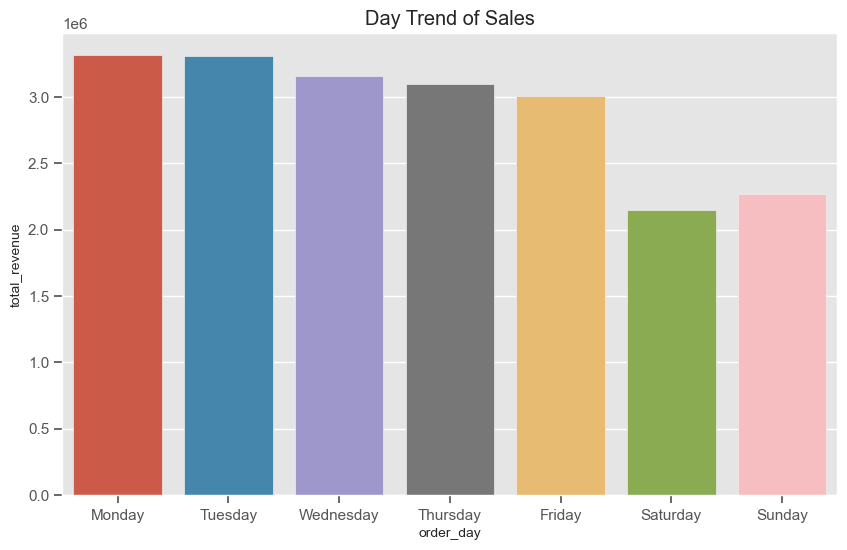

In [120]:
plt.figure(figsize=(10,6))
sns.barplot(df,x=Daily_summary.order_day,y=Daily_summary.total_revenue)
plt.title('Day Trend of Sales')
plt.tight_layout
plt.show()

* Sales and Qty by payment mehtods

In [89]:
payment_methods_summary = df.groupby('payment_type')['payment_value'].sum().reset_index().rename(
    columns={'payment_value':'total revenue'}).sort_values(by='total revenue',ascending=False).reset_index(drop=True)
payment_methods_summary

,payment_type,total revenue
0,credit_card,15589028.22
1,UPI,4059699.60
2,voucher,405873.03
3,debit_card,253533.86


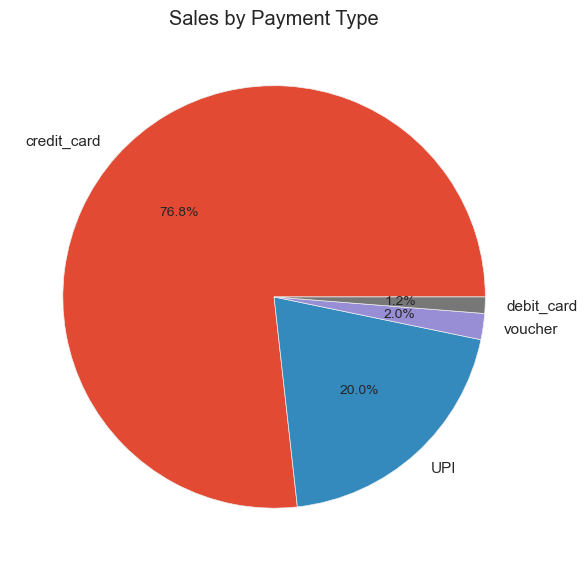

In [90]:
plt.figure(figsize=(6,6))
plt.pie(payment_methods_summary['total revenue'],labels = payment_methods_summary['payment_type'],autopct='%1.1f%%')
plt.title('Sales by Payment Type')
plt.tight_layout()
plt.show()

# f. Top-Selling Products by Month, Seller, State and Category

In [156]:
popular_by_month = df.groupby(['order_month','product_id'])['order_item_id'].count().reset_index().rename(
    columns={'order_item_id':'total_quantity'}).sort_values(['order_month','total_quantity'],ascending=[True,False]
                                                           ).reset_index(drop=True)

top5_popular_by_month = popular_by_month.groupby('order_month').head(5)
top5_popular_by_month

,order_month,product_id,total_quantity
0,2016-09,c1488892604e4ba5cff5b4eb4d595400,1
1,2016-09,f293394c72c9b5fafd7023301fc21fc2,1
2,2016-09,f3c2d01a84c947b078e32bbef0718962,1
3,2016-10,eba7488e1c67729f045ab43fac426f2e,11
4,2016-10,85b99d83c60cab5b4d8f927ad35212a1,7
...,...,...,...
57806,2018-08,73326828aa5efe1ba096223de496f596,56
57807,2018-08,19c91ef95d509ea33eda93495c4d3481,32
57808,2018-08,2bd9b51a9ab079e095aca987845d3266,29
57809,2018-08,a92930c327948861c015c919a0bcb4a8,29


In [157]:
popular_by_seller = df.groupby(['seller_id','product_id'])['order_item_id'].count().reset_index().rename(
    columns={'order_item_id':'total_quantity'}).sort_values(['seller_id','total_quantity'],ascending=[True,False]
                                                           ).reset_index(drop=True)

top1_popular_by_seller = popular_by_seller.groupby('seller_id').head(1)
top1_popular_by_seller

,seller_id,product_id,total_quantity
0,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,3
1,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,115
12,001e6ad469a905060d959994f1b41e4f,093cd981b714bcdff182b427d87fc8fc,1
13,002100f778ceb8431b7a1020ff7ab48f,158102fe543dbaeb84d87811bfe06d0d,17
37,003554e2dce176b5555353e4f3555ac8,67f36b3689147d882d2b298fd0715d80,1
...,...,...,...
34388,ffcfefa19b08742c5d315f2791395ee5,cea898bfbca0b5b0e7b36cecd350709e,1
34389,ffdd9f82b9a447f6f8d4b91554cc7dd3,ada800a927673ac73cdfbbd2c832331b,5
34401,ffeee66ac5d5a62fe688b9d26f83f534,1347d4320dcd0acd750e37bb3d94a918,10
34404,fffd5413c0700ac820c7069d66d98c89,ebb12274522d82caa7dca657873b2ad7,6


In [160]:
popular_by_state = df.groupby(['customer_state','product_id'])['order_item_id'].count().reset_index().rename(
    columns={'order_item_id':'total_quantity'}).sort_values(['customer_state','total_quantity'],ascending=[True,False]
                                                           ).reset_index(drop=True)

top1_popular_by_state = popular_by_state.groupby('customer_state').head(1)
top1_popular_by_state

,customer_state,product_id,total_quantity
0,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,346
24298,Arunachal Pradesh,03e1c946c0ddfc58724ff262aef08dff,12
25306,Chhattisgarh,422879e10f46682990de24d770e7f83d,42
29929,Delhi,53759a2ecddad2bb87a079a1f1519f73,25
32584,Goa,2a5806f10d0f00e5ad032dd2e3c8806e,1
32594,Gujarat,aca2eb7d00ea1a7b8ebd4e68314663af,52
37816,Haryana,35afc973633aaeb6b877ff57b2793310,17
39686,Himachal Pradesh,422879e10f46682990de24d770e7f83d,6
40394,Jammu & Kashmir,89b190a046022486c635022524a974a8,15
41755,Karnataka,422879e10f46682990de24d770e7f83d,25


In [162]:
popular_by_cat = df.groupby(['product_category_name','product_id'])['order_item_id'].count().reset_index().rename(
    columns={'product_category_name':'category','order_item_id':'total_quantity'}).sort_values(['category','total_quantity'],ascending=[True,False]
                                                           ).reset_index(drop=True)

top2_popular_by_cat = popular_by_cat.groupby('category').head(2)
top2_popular_by_cat

,category,product_id,total_quantity
0,Agro_Industry_And_Commerce,11250b0d4b709fee92441c5f34122aed,44
1,Agro_Industry_And_Commerce,423a6644f0aa529e8828ff1f91003690,19
74,Air_Conditioning,98e91d0f32954dcd8505875bb2b42cdb,17
75,Air_Conditioning,ccb162ed569f47d83f62aebd5700d7ad,13
198,Art,4fe644d766c7566dbc46fb851363cb3b,109
...,...,...,...
28455,Telephony,c9c6fde711572c1ad99ca12728c6af00,79
29588,Toys,880be32f4db1d9f6e2bec38fb6ac23ab,105
29589,Toys,b5e13c9a353102f79c6206ff5cb61a50,94
30999,Watches_Gifts,53b36df67ebb7c41585e8d54d6772e08,327


# g. Most Popular Categories by State and Month

In [193]:
pop_cat_by_state = df.groupby(['customer_state',df['product_category_name'].rename(
    'category')])['product_category_name'].count().reset_index().rename(columns={'product_category_name':'category_count'}
                                                                       ).sort_values(['customer_state','category_count'],
                                                                                     ascending=[True,False]).reset_index(drop=True)
                                                                                    

In [194]:
top1_cat_by_state = pop_cat_by_state.groupby('customer_state').head(1)
top1_cat_by_state[['customer_state','category']]

,customer_state,category
0,Andhra Pradesh,Bed_Bath_Table
71,Arunachal Pradesh,Bed_Bath_Table
125,Chhattisgarh,Bed_Bath_Table
192,Delhi,Health_Beauty
255,Goa,Auto
265,Gujarat,Bed_Bath_Table
333,Haryana,Bed_Bath_Table
391,Himachal Pradesh,Bed_Bath_Table
442,Jammu & Kashmir,Bed_Bath_Table
499,Karnataka,Bed_Bath_Table


In [196]:
pop_cat_by_month = df.groupby(['order_month',df['product_category_name'].rename(
    'category')])['product_category_name'].count().reset_index().rename(columns={'product_category_name':'category_count'}
                                                                       ).sort_values(['order_month','category_count'],
                                                                                     ascending=[True,False]).reset_index(drop=True)
                                                                                    

In [197]:
top1_cat_by_month = pop_cat_by_month.groupby('order_month').head(1)
top1_cat_by_month[['order_month','category']]

,order_month,category
0,2016-09,Furniture_Decor
2,2016-10,Furniture_Decor
33,2016-12,Fashion_Bags_Accessories
34,2017-01,Furniture_Decor
77,2017-02,Furniture_Decor
128,2017-03,Furniture_Decor
181,2017-04,Bed_Bath_Table
238,2017-05,Bed_Bath_Table
296,2017-06,Bed_Bath_Table
355,2017-07,Bed_Bath_Table


# h. Top 10 Most Expensive Products

In [207]:
top_10_expensive_products = df[['product_id', 'price']].sort_values('price', ascending=False
                                                                   ).drop_duplicates('product_id').head(10)
top_10_expensive_products

,product_id,price
69841,489ae2aa008f021502940f251d4cce7f,6735.00
80595,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00
42934,1bdf5e6731585cf01aa8169c7028d6ad,6499.00
86571,a6492cc69376c469ab6f61d8f44de961,4799.00
67405,c3ed642d592594bb648ff4a04cee2747,4690.00
96357,259037a6a41845e455183f89c5035f18,4590.00
107420,a1beef8f3992dbd4cd8726796aa69c53,4399.87
50443,6cdf8fc1d741c76586d8b6b15e9eef30,4099.99
113673,dd113cb02b2af9c8e5787e8f1f0722f6,4059.00
113686,6902c1962dd19d540807d0ab8fade5c6,3999.90


# 2. Customers and Seller Segmentation

a. Customer Segmentation Based on Revenue Contribution 

b. Seller Segmentation Based on Revenue Contribution 

In [209]:
customer_revenue = df.groupby('customer_id')['payment_value'].sum().reset_index().rename(
    columns={'payment_value': 'total_revenue'})

In [211]:
customer_revenue['revenue_group'] = pd.qcut(customer_revenue['total_revenue'], q=4, labels=[
    'Low', 'Medium', 'High', 'Very High'])
customer_revenue

,customer_id,total_revenue,revenue_group
0,00012a2ce6f8dcda20d059ce98491703,114.74,High
1,000161a058600d5901f007fab4c27140,67.41,Medium
2,0001fd6190edaaf884bcaf3d49edf079,195.42,High
3,0002414f95344307404f0ace7a26f1d5,179.35,High
4,000379cdec625522490c315e70c7a9fb,107.01,Medium
...,...,...,...
98660,fffcb937e9dd47a13f05ecb8290f4d3e,91.91,Medium
98661,fffecc9f79fd8c764f843e9951b11341,81.36,Medium
98662,fffeda5b6d849fbd39689bb92087f431,63.13,Medium
98663,ffff42319e9b2d713724ae527742af25,214.13,Very High


In [213]:
sellers_revenue = df.groupby('seller_id')['payment_value'].sum().reset_index().rename(
    columns={'payment_value': 'total_revenue'})

sellers_revenue['revenue_group'] = pd.qcut(sellers_revenue['total_revenue'], q=4, labels=[
    'Low', 'Medium', 'High', 'Very High'])
sellers_revenue

,seller_id,total_revenue,revenue_group
0,0015a82c2db000af6aaaf3ae2ecb0532,2748.06,High
1,001cca7ae9ae17fb1caed9dfb1094831,48349.22,Very High
2,001e6ad469a905060d959994f1b41e4f,267.94,Low
3,002100f778ceb8431b7a1020ff7ab48f,2445.64,High
4,003554e2dce176b5555353e4f3555ac8,139.38,Low
...,...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,79.52,Low
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,3607.52,High
3092,ffeee66ac5d5a62fe688b9d26f83f534,2259.55,High
3093,fffd5413c0700ac820c7069d66d98c89,12834.27,Very High


# 3. Cross-Selling Insights
Frequently Bought Together: Top Product Combinations

In [217]:
from itertools import combinations
from collections import Counter

orders_products = df.groupby('order_id')['product_id'].apply(list)

pair_counter = Counter()

for products in orders_products:
    if len(products) >= 2:
        # Get all combinations of size 2
        pairs = combinations(sorted(set(products)), 2)  ##without sorted p1,p2 and p2,p1 counted seperately
        pair_counter.update(pairs)

# Convert Counter to DataFrame
pair_df = pd.DataFrame(pair_counter.items(), columns=['product_pair', 'frequency'])

# Sort and get top 10
top_10_pairs = pair_df.sort_values(by='frequency', ascending=False).head(10).reset_index(drop=True)
top_10_pairs


,product_pair,frequency
0,"(36f60d45225e60c7da4558b070ce4b60, e53e557d5a1...",34
1,"(35afc973633aaeb6b877ff57b2793310, 99a4788cb24...",29
2,"(4fcb3d9a5f4871e8362dfedbdb02b064, f4f67ccaece...",17
3,"(36f60d45225e60c7da4558b070ce4b60, 3f14d740544...",12
4,"(389d119b48cf3043d311335e499d9c6b, 422879e10f4...",11
5,"(389d119b48cf3043d311335e499d9c6b, 53759a2ecdd...",9
6,"(368c6c730842d78016ad823897a372db, 53759a2ecdd...",8
7,"(18486698933fbb64af6c0a255f7dd64c, dbb67791e40...",7
8,"(422879e10f46682990de24d770e7f83d, 53759a2ecdd...",7
9,"(4d0ec1e9b95fb62f9a1fbe21808bf3b1, 9ad75bd7267...",6


# 4. Payment Behaviour Analysis
a. Customer Payment Preferences

In [221]:
payment_type_orders = df.groupby('payment_type')['order_id'].nunique().reset_index()
payment_type_orders.columns = ['payment_type', 'num_orders']
payment_type_orders

,payment_type,num_orders
0,UPI,19614
1,credit_card,75991
2,debit_card,1521
3,voucher,3766


# 5. Customer Satisfaction Analysis
a. Top & Bottom Rated Categories (Based on Customer Reviews)

In [227]:
df1 = pd.merge(df, order_review, on='order_id', how='inner')

In [253]:
cat_rating = df1.groupby('product_category_name')['review_score'].agg(['mean', 'count']).reset_index()
cat_rating.columns = ['category', 'avg_rating', 'num_ratings']

cat_rating_filtered = cat_rating[cat_rating['num_ratings'] >= 5]

# Sort for top 10 and bottom 10
top10_categories = cat_rating_filtered.sort_values(by='avg_rating', ascending=False).head(10)
bottom10_categories = cat_rating_filtered.sort_values(by='avg_rating', ascending=True).head(10)

top10_categories

,category,avg_rating,num_ratings
11,Cds_Dvds_Musicals,4.64,14
29,Fashion_Childrens_Clothes,4.50,8
8,Books_General_Interest,4.43,565
9,Books_Imported,4.42,62
10,Books_Technical,4.35,272
22,Costruction_Tools_Tools,4.33,105
64,Small_Appliances_Home_Oven_And_Coffee,4.32,78
37,Food_Drink,4.31,291
53,Luggage_Accessories,4.29,1163
32,Fashion_Sport,4.26,31


In [254]:
bottom10_categories

,category,avg_rating,num_ratings
23,Diapers_And_Hygiene,3.26,39
46,Home_Comfort_2,3.39,31
57,Office_Furniture,3.52,1788
30,Fashion_Male_Clothing,3.53,145
34,Fixed_Telephony,3.66,272
27,Fashio_Female_Clothing,3.78,50
41,Furniture_Mattress_And_Upholstery,3.80,41
4,Audio,3.82,381
19,Construction_Tools_Safety,3.83,199
38,Furniture_Bedroom,3.84,126


b. Top & Bottom Rated Products

In [250]:
prod_rating = df1.groupby('product_id')['review_score'].agg(['mean', 'count']).reset_index()
prod_rating.columns = ['product_id', 'avg_rating', 'num_ratings']

prod_rating_filtered = prod_rating[prod_rating['num_ratings'] >= 5]
prod_rating_filtered = prod_rating_filtered.sort_values(by='avg_rating', ascending=False).reset_index(drop=True)

# Top 10 highest rated products
top10_products = prod_rating_filtered.head(10)

# Bottom 10 lowest rated products
bottom10_products = prod_rating_filtered.tail(10).sort_values(by='avg_rating')

top10_products

,product_id,avg_rating,num_ratings
0,fffdb2d0ec8d6a61f0a0a0db3f25b441,5.00,5
1,4c8b28305f570899b6ded964ddd234a9,5.00,12
2,4ce6c1b5cfe26c9f980438fc1c810f8d,5.00,6
3,4ce81153410b379f2ccab68653ca5fe4,5.00,9
4,1efd84ba20d23186f576a37baf64ae9d,5.00,6
5,4df96b4c5286321b71834691e8defd53,5.00,6
6,4f3192a28c9da057319996e1502dc216,5.00,7
7,0cc18feec97e534a363ec0b14c632692,5.00,6
8,4f5459b07e4a3e0897228ccfe3aa474d,5.00,5
9,0cb8c29f963ae2069fcc3afe95fd93c1,5.00,5


In [251]:
bottom10_products

,product_id,avg_rating,num_ratings
5189,05b515fdc76e888aada3c6d66c201dff,1.00,10
5190,63a2b46cda9cae69cbbb77dc2b0165ac,1.00,5
5191,399f54c06661d06ca45c6e24ed238e0e,1.00,6
5192,62995b7e571f5760017991632bbfd311,1.00,6
5193,c4cf7c2e1f190d51517eba7e8211c8e6,1.00,7
5194,bdeac558883a62ab1a048c8f3a0cdf3c,1.00,5
5195,ce6184189a523c1eb5fe5113061780b9,1.00,6
5196,5c3eaf54e8ee5d5378765ff16df7640b,1.00,6
5197,b48d3e49914549b781c0b59f819b398e,1.00,5
5198,986700c98805af229ab7ad51b95fa356,1.00,7


c. Average Review Scores by Location, Seller, Month and Category

In [258]:
avg_rating_by_state = df1.groupby('customer_state')['review_score'].mean().reset_index().sort_values(
    by='review_score', ascending=False)
avg_rating_by_state

,customer_state,review_score
4,Goa,4.80
14,Punjab,4.17
17,Uttar Pradesh,4.13
6,Haryana,4.12
16,Tamil Nadu,4.11
15,Rajasthan,4.10
12,Maharashtra,4.09
13,Orissa,4.09
10,Kerala,4.05
5,Gujarat,4.04


In [259]:
avg_rating_by_seller = df1.groupby('seller_id')['review_score'].mean().reset_index().sort_values(
    by='review_score', ascending=False)
avg_rating_by_seller

,seller_id,review_score
2335,c18309219e789960add0b2255ca4b091,5.00
385,2075d8cd4dd63ff12df0749a5866bb06,5.00
775,40ec8ab6cdafbcc4f544da38c67da39a,5.00
777,4125d9385a25e82d2f72d3a0fd55bc3f,5.00
780,417a1e6c7321084d2a0ae0d023cfad93,5.00
...,...,...
2965,f524ad65d7e0f1daab730ef2d2e86196,1.00
1438,749e7cdabbaf72f16677859e27874ba5,1.00
2967,f5403d3f50089112c4eed37928b7f622,1.00
2645,dadc51ef321949ec9a3ab25cd902e23d,1.00


In [260]:
avg_rating_by_month = df1.groupby('order_month')['review_score'].mean().reset_index().sort_values(
    by='order_month')
avg_rating_by_month

,order_month,review_score
0,2016-09,1.00
1,2016-10,3.59
2,2016-12,5.00
3,2017-01,4.09
4,2017-02,4.04
5,2017-03,4.05
6,2017-04,3.96
7,2017-05,4.12
8,2017-06,4.12
9,2017-07,4.11


In [261]:
avg_rating_by_category = df1.groupby('product_category_name')['review_score'].mean().reset_index().sort_values(
    by='review_score', ascending=False)
avg_rating_by_category

,product_category_name,review_score
11,Cds_Dvds_Musicals,4.64
29,Fashion_Childrens_Clothes,4.50
8,Books_General_Interest,4.43
9,Books_Imported,4.42
10,Books_Technical,4.35
...,...,...
30,Fashion_Male_Clothing,3.53
57,Office_Furniture,3.52
46,Home_Comfort_2,3.39
23,Diapers_And_Hygiene,3.26
